In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Name: Name of each pokemon

# Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

# Type 2: Some pokemon are dual type and have 2

# Total: sum of all stats that come after this, a general guide to how strong a pokemon is

# HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

# Attack: the base modifier for normal attacks (eg. Scratch, Punch)

# Defense: the base damage resistance against normal attacks

# SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

# SP Def: the base damage resistance against special attacks

# Speed: determines which pokemon attacks first each round

In [3]:
poke = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Pokemon.csv")
poke.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# 1. Explore Data

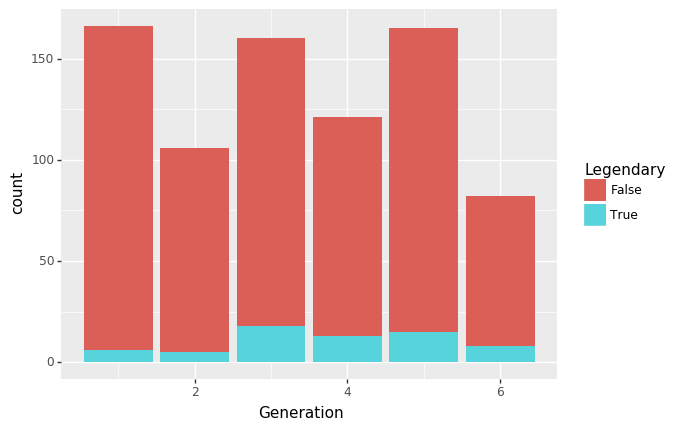

<ggplot: (317225441)>

In [4]:
ggplot(poke, aes("Generation", fill = "Legendary")) + geom_bar()

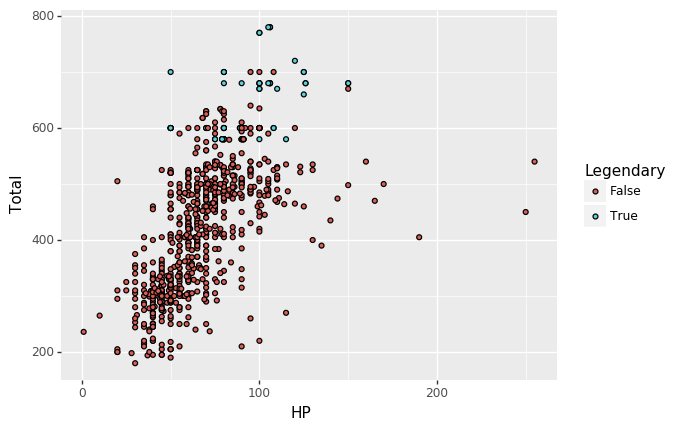

<ggplot: (316648725)>

In [5]:
ggplot(poke, aes("HP", "Total")) + geom_point(aes(fill = "Legendary"))

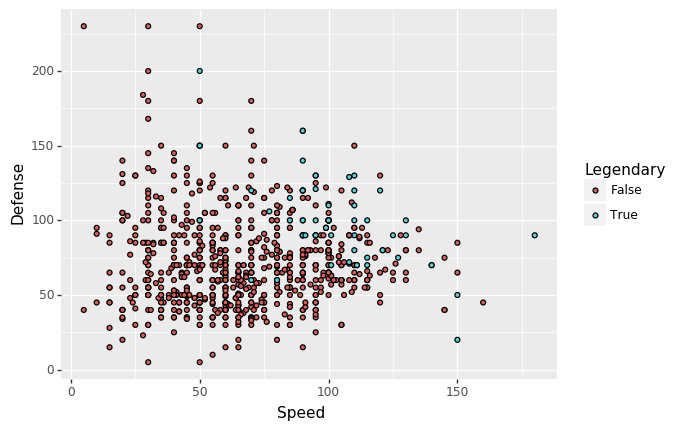

<ggplot: (317712945)>

In [6]:
ggplot(poke, aes("Speed", "Defense")) + geom_point(aes(fill = "Legendary"))

I see that most of the legendary pokemons are equiped with the best attacks and defenses which makes sense. 

# 2. K-means model

In [7]:
features = ["Legendary","HP", "Total", "Speed","Attack", "Defense"]
X = poke[features]

z = StandardScaler()
X[features] = z.fit_transform(X)

km = KMeans(n_clusters = 5)

km.fit(X)

membership = km.predict(X)

X["cluster"] = membership

silhouette_score(X, membership)

0.45044341226229606

which features did you use and why? - I used "Legendary","HP", "Total", "Speed","Attack", and "Defense" to member the pokemon because I felt theses were important variables to identify pokemon

did you standardize your variables? why or why not? - yes I did because not all variables were not measured on the same scale.

which k works best? what metrics did you use to determine this? - I ran the model several times with different k values and found that between 4 and 5 n_clusters was the best amount for maximizing our silhouette score

# 3. Gaussian Mixture model


In [8]:
features = ["Legendary","HP", "Total", "Speed","Attack", "Defense"]

X = poke[features]
z = StandardScaler()
X[features] = z.fit_transform(X)
Xdf = X


n_components = [2,3,4,5,6]

sils = []
for n in n_components:
    gmm = GaussianMixture(n_components = n)
    gmm.fit(X)
    colName = str(n) + "assign"
    clusters = gmm.predict(X)
    
    Xdf[colName] = clusters
    
    sils.append(silhouette_score(X, clusters))
    
print(sils)

[0.5029335973278094, 0.5061383802739656, 0.4911189789750171, 0.5033830610048823, 0.5392913667951059]


which features did you use and why? - I used "Legendary","HP", "Total", "Speed","Attack", and "Defense" to member the pokemon because I felt theses were important variables to identify pokemon

did you standardize your variables? why or why not? - yes I did because not all variables were not measured on the same scale.

which number of components works best? what metrics did you use to determine this? - After running the model for 2,3,4,5,and 6 num pf components, the silhouette score showed that 5 components was the ideal amount of components. 

# Hierarchical model

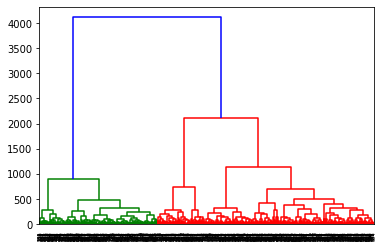

In [9]:
features = ["Legendary","HP", "Total", "Speed","Attack", "Defense"]

X = poke[features]

hac = AgglomerativeClustering(affinity = "euclidean",
                             linkage = "ward")

hac.fit(X)

dendro = sch.dendrogram(sch.linkage(X, method='ward'))

In [10]:
hac = AgglomerativeClustering(n_clusters =2,
                              affinity = "euclidean",
                             linkage = "ward")
hac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [11]:
membershiph = hac.labels_
membershiph

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,

In [12]:
silhouette_score(X,membershiph)


0.5002392714696835

which features did you use and why? - I used "Legendary","HP", "Total", "Speed","Attack", and "Defense" to member the pokemon because I felt theses were important variables to identify pokemon

did you standardize your variables? why or why not? - yes I did because not all variables were not measured on the same scale.

which number of clusters works best? what metrics did you use to determine this? - I used 2 clusters because it produced the best silhouette score, also this amount of clusters is the least computationally expensive. 


# 5. Compare the results from each model

Were the clusters created by each method similar? - Yes I would say the models were very similar. 

Describe the clusters from each method (in other words, are the mean values for features different between clusters? - I did not see a huge differenct in the mean values between clusters

How would you describe each cluster to someone who hasn't seen the data before? e.g. "This cluster is very fast, and has a low attack....etc") - I would describe these clusters by saying which were closer to legendary or not. 

# GGPLOT Per Method


# K-means model

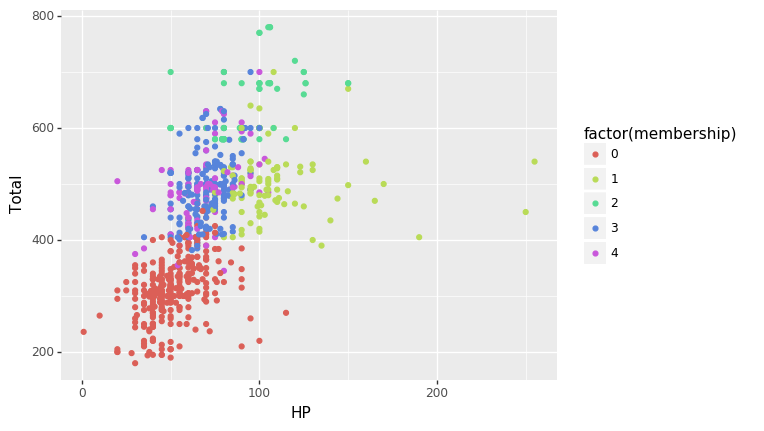

<ggplot: (317687565)>

In [13]:
(ggplot(X, aes("HP", "Total", color = "factor(membership)")) + geom_point())

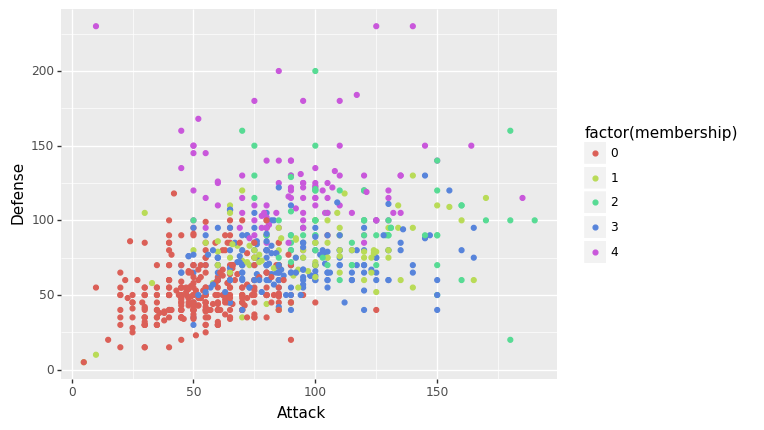

<ggplot: (316658233)>

In [14]:
(ggplot(X, aes("Attack", "Defense", color = "factor(membership)")) + geom_point())

# Gaussian Mixture model

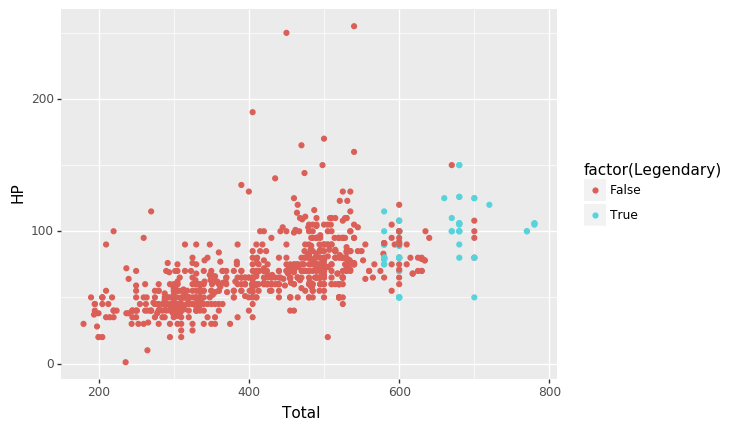

<ggplot: (320273381)>

In [18]:
(ggplot(X, aes("Total","HP", color = "factor(Legendary)")) + geom_point())


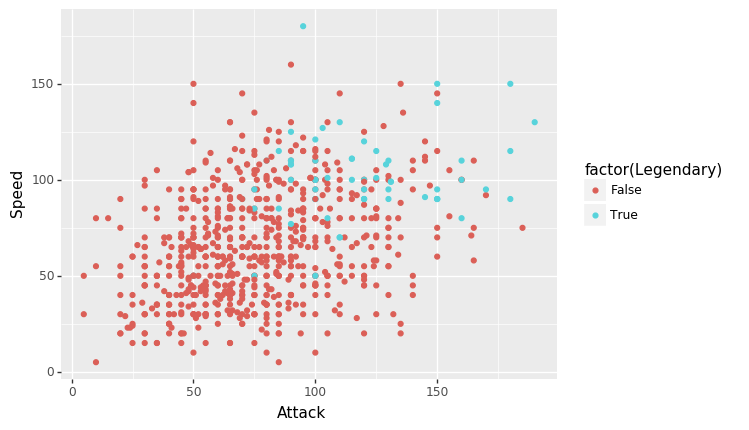

<ggplot: (320297417)>

In [19]:
(ggplot(X, aes("Attack","Speed", color = "factor(Legendary)")) + geom_point())


# Hierarchical model

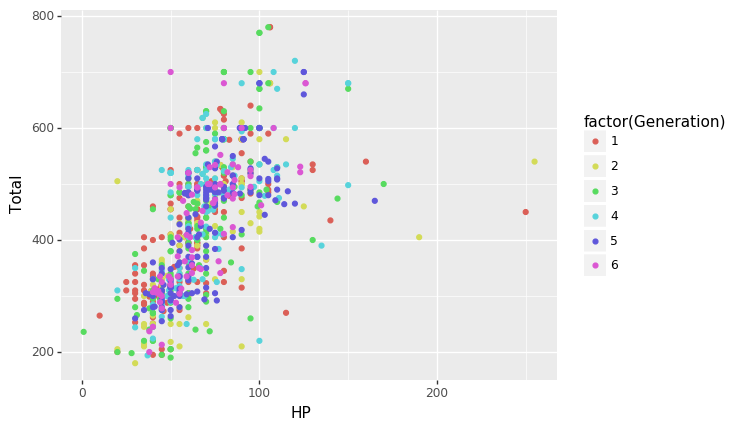

<ggplot: (320173553)>

In [20]:
(ggplot(poke, aes("HP", "Total")) + geom_point(aes(color = "factor(Generation)")))


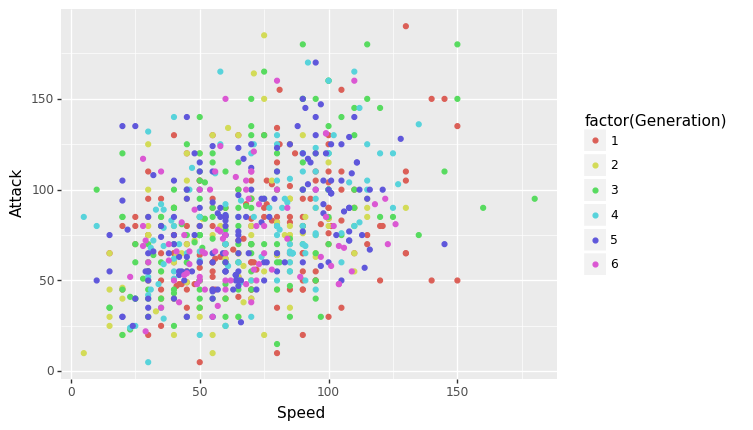

<ggplot: (320297577)>

In [21]:
(ggplot(poke, aes("Speed", "Attack")) + geom_point(aes(color = "factor(Generation)")))
